<a href="https://colab.research.google.com/github/Standby-Coder/Wealth-Index-Prediction/blob/main/DSC_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ltFWYRbLbkeb7VjLLNBy61S5pj_sL78t' -O Dataset.zip

--2022-04-11 11:59:00--  https://docs.google.com/uc?export=download&id=1ltFWYRbLbkeb7VjLLNBy61S5pj_sL78t
Resolving docs.google.com (docs.google.com)... 74.125.26.100, 74.125.26.138, 74.125.26.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a5l1bmi2al8i6gadpqok2fqtpgrs9kdp/1649678325000/00398568214550865964/*/1ltFWYRbLbkeb7VjLLNBy61S5pj_sL78t?e=download [following]
--2022-04-11 11:59:02--  https://doc-0s-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a5l1bmi2al8i6gadpqok2fqtpgrs9kdp/1649678325000/00398568214550865964/*/1ltFWYRbLbkeb7VjLLNBy61S5pj_sL78t?e=download
Resolving doc-0s-a8-docs.googleusercontent.com (doc-0s-a8-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to doc-0s-a8-docs.googleusercontent.com (doc-0s-a8-docs.googleu

In [ ]:
!unzip Dataset.zip

Archive:  Dataset.zip
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from itertools import combinations
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%config InLineBackend.figure_format = 'png'

In [ ]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample_sub = pd.read_csv("SampleSubmission.csv") 

In [ ]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       21454 non-null  object 
 1   country                                  21454 non-null  object 
 2   year                                     21454 non-null  int64  
 3   urban_or_rural                           21454 non-null  object 
 4   ghsl_water_surface                       21454 non-null  float64
 5   ghsl_built_pre_1975                      21454 non-null  float64
 6   ghsl_built_1975_to_1990                  21454 non-null  float64
 7   ghsl_built_1990_to_2000                  21454 non-null  float64
 8   ghsl_built_2000_to_2014                  21454 non-null  float64
 9   ghsl_not_built_up                        21454 non-null  float64
 10  ghsl_pop_density                         21454

In [ ]:
train.isnull().sum() 

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [ ]:
train.describe()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000
mean,2010.060874,0.028259,0.038222,0.028644,0.012689,0.018386,0.873800,95.756775,21.034265,13.999061,1.486849,0.714891,8.506543,289.722268,402.608539,0.350736
std,4.799579,0.097490,0.113562,0.077367,0.032745,0.040421,0.239294,209.704761,16.751106,23.715485,6.550171,2.383701,21.090378,238.811778,321.517285,0.194376
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105306,0.112080,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000043,0.000124,0.897867,3.848533,5.610515,0.798841,0.000000,0.001325,0.000000,115.890873,126.379463,0.195772
50%,2011.000000,0.000000,0.000198,0.000709,0.001001,0.001871,0.991919,17.632672,18.509291,2.770159,0.000516,0.029151,0.137333,256.736472,327.271973,0.293574
75%,2014.000000,0.000000,0.007987,0.009868,0.008128,0.014936,0.999532,63.225683,33.590293,12.621501,0.152364,0.381969,4.830194,401.153071,643.910675,0.499003
max,2016.000000,0.969956,0.877116,0.685010,0.515534,0.649159,1.000000,1741.256516,80.064918,98.784092,99.164018,56.201637,382.932769,1897.351575,1769.523906,1.000000


In [ ]:
len(train['country'].unique())

18

In [ ]:
class DataPreprocess:
    def __init__(self, train_data):
        self.train_data = train_data
        self.labenc = LabelEncoder()
        
    def showSplit(self, train, test):
        print("Shape of Training dataset = ", train.shape)
        #print("Shape of Dev dataset = ", dev.shape)
        print("Shape of Test dataset = ", test.shape)
        
    def splitData(self, trainsplit):
        train, test = train_test_split(self.train_data, test_size = 1 - trainsplit)
        #dev, test = train_test_split(temp, test_size = 0.5)
        self.showSplit(train, test)
        return train, test
    
    def MyEncoder(self, col):
        encoder = LabelEncoder()
        newcol = encoder.fit_transform(col)
        return newcol, encoder 

    def labelEncoder(self, col = ['urban_or_rural']):
        EncoderDic = {}
        #cols = set(list(self.train_data.columns)) - set(drop)
        for c in col: #self.train_data.select_dtypes(include = 'object').columns.tolist():
            self.train_data[c], EncoderDic[c] = self.MyEncoder(self.train_data[c])
        return EncoderDic
    
    def makeNewFeatures(self, colA, colB, operation):
        #newData = self.train_data.copy()#.replace({0: None})
        for col1 in colA:
            for col2 in colB:
                if col1 != col2:
                    for op in operation:
                        self.train_data[op +"_"+ col1 + "_per_" + col2] = self.train_data.groupby([col1])[col2].transform(op)
                        #self.train_data[operation +"_"+ col1 + "_per_" + col2] = self.train_data[operation +"_"+ col1 + "_per_" + col2].replace({np.inf : 0})

        return self.train_data

    def makeNewFeatures_2(self, colA, operation):
        for col1 in colA: 
            for iden in ['ID', 'country']:
                for op in operation:
                    self.train_data["RANK_"+ col1 + "_" + op] = self.train_data.groupby([iden, col1])[iden].rank(method = op, ascending = True)
                    #self.train_data[operation +"_"+ col1 + "_per_" + col2] = self.train_data[operation +"_"+ col1 + "_per_" + col2].replace({np.inf : 0})
        return self.train_data

    def makeNewFeatures_Diff(self, colA):    
        for col1, col2 in combinations(colA, 2):
            self.train_data['Grad_'+ col1 + "_" + col2] = self.train_data[col1] - self.train_data[col2]
        return self.train_data

    def normalize(self, cols):
        for i in cols:
            if(i == "Target"):
                continue
            self.train_data[i] = self.train_data[i] - self.traindata[i].mean()/self.train_data[i].std()
        
    def drop(self, cols):
        self.train_data.drop(labels = cols, inplace = True, axis = 1)
    
    def convToInt(self,cols):
        for i in cols:
            self.train_data[i] = self.train_data[i].astype('int64')

In [ ]:
trainPro = DataPreprocess(train)

In [ ]:
objList = []
for x in train.select_dtypes(include = 'object').columns.tolist():
    objList.append(x)
objList

['ID', 'country', 'urban_or_rural']

In [ ]:
EncoDic = trainPro.labelEncoder()

In [ ]:
ColA = ['year', 'country', 'ghsl_pop_density', 'nighttime_lights', 'urban_or_rural']
ColB = ['year', 'ghsl_pop_density', 'nighttime_lights', 'dist_to_shoreline', 'dist_to_capital']
ColC = ['ghsl_pop_density', 'nighttime_lights', 'urban_or_rural', 'dist_to_shoreline', 'dist_to_capital', 'year', 'country']
ColD = ['ghsl_built_pre_1975', 'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000', 'ghsl_built_2000_to_2014', 'ghsl_not_built_up']

In [ ]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,0,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,0,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,1,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [ ]:
train = trainPro.makeNewFeatures(ColA, ColB, operation= ['mean', 'max', 'count', 'median', 'min', 'std', 'sum'])

In [ ]:
#train = trainPro.makeNewFeatures_2(ColC, operation = ['first', 'max', 'min', 'average'])

In [ ]:
train = trainPro.makeNewFeatures_Diff(ColD)

In [ ]:
train.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,...,Grad_ghsl_built_pre_1975_ghsl_built_1975_to_1990,Grad_ghsl_built_pre_1975_ghsl_built_1990_to_2000,Grad_ghsl_built_pre_1975_ghsl_built_2000_to_2014,Grad_ghsl_built_pre_1975_ghsl_not_built_up,Grad_ghsl_built_1975_to_1990_ghsl_built_1990_to_2000,Grad_ghsl_built_1975_to_1990_ghsl_built_2000_to_2014,Grad_ghsl_built_1975_to_1990_ghsl_not_built_up,Grad_ghsl_built_1990_to_2000_ghsl_built_2000_to_2014,Grad_ghsl_built_1990_to_2000_ghsl_not_built_up,Grad_ghsl_built_2000_to_2014_ghsl_not_built_up
0,ID_AAIethGy,Ethiopia,2016,0,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,...,0.000000,-0.000055,-0.000536,-0.999408,-0.000055,-0.000536,-0.999408,-0.000481,-0.999353,-0.998872
1,ID_AAYiaCeL,Ethiopia,2005,0,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,...,-0.000110,0.000000,-0.000018,-0.999872,0.000110,0.000092,-0.999762,-0.000018,-0.999872,-0.999854
2,ID_AAdurmKj,Mozambique,2009,0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000
3,ID_AAgNHles,Malawi,2015,0,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,...,-0.000041,-0.000114,-0.000088,-0.999055,-0.000073,-0.000047,-0.999014,0.000026,-0.998941,-0.998967
4,ID_AAishfND,Guinea,2012,1,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,...,-0.005912,-0.005734,-0.088226,-0.841885,0.000178,-0.082314,-0.835973,-0.082492,-0.836151,-0.753659


In [ ]:
train.drop(['ID', 'country'], inplace = True, axis = 1) 

In [ ]:
#KM_cluster = KMeans(n_clusters = 18).fit(train.drop('Target', axis = 1))

In [ ]:
#train['Cluster'] = KM_cluster.predict(train.drop('Target', axis = 1))

In [ ]:
import lightgbm as lgb
from sklearn import metrics

In [ ]:
val_train, val_test =  trainPro.splitData(0.8) 

Shape of Training dataset =  (17163, 181)
Shape of Test dataset =  (4291, 181)


In [ ]:
train_x = train.drop(['Target'], axis =1)
train_y = train['Target']

In [ ]:
val_train_x = val_train.drop(['Target'], axis =1)
val_train_y = val_train['Target']
val_test_x = val_test.drop(['Target'], axis =1)
val_test_y = val_test['Target']

In [ ]:
model = lgb.LGBMRegressor(
    learning_rate= 0.09, 
    max_depth= -5,
    n_jobs= -1,
    )

model.fit(
        train_x, train_y, 
        eval_set=[(val_test_x, val_test_y), (val_train_x, val_train_y)],
        verbose=20, eval_metric= 'neg_mean_squared_error'
    )

[20]	valid_0's l2: 0.0088733	valid_1's l2: 0.00875156
[40]	valid_0's l2: 0.00718205	valid_1's l2: 0.00702037
[60]	valid_0's l2: 0.00665995	valid_1's l2: 0.00650908
[80]	valid_0's l2: 0.00633218	valid_1's l2: 0.00618929
[100]	valid_0's l2: 0.00607474	valid_1's l2: 0.00593808


LGBMRegressor(learning_rate=0.09, max_depth=-5)

In [ ]:
#from sklearn.model_selection import GridSearchCV
#hparams = {
#    'learning_rate': [ 0.09, 0.08], 
#    'max_depth': [-4, -5] 
#}
#modelBest = GridSearchCV(lgb.LGBMRegressor(), param_grid = hparams, scoring = 'neg_root_mean_squared_error', cv = 5, verbose = 3)

In [ ]:
#modelBest.fit(train_x, train_y) 

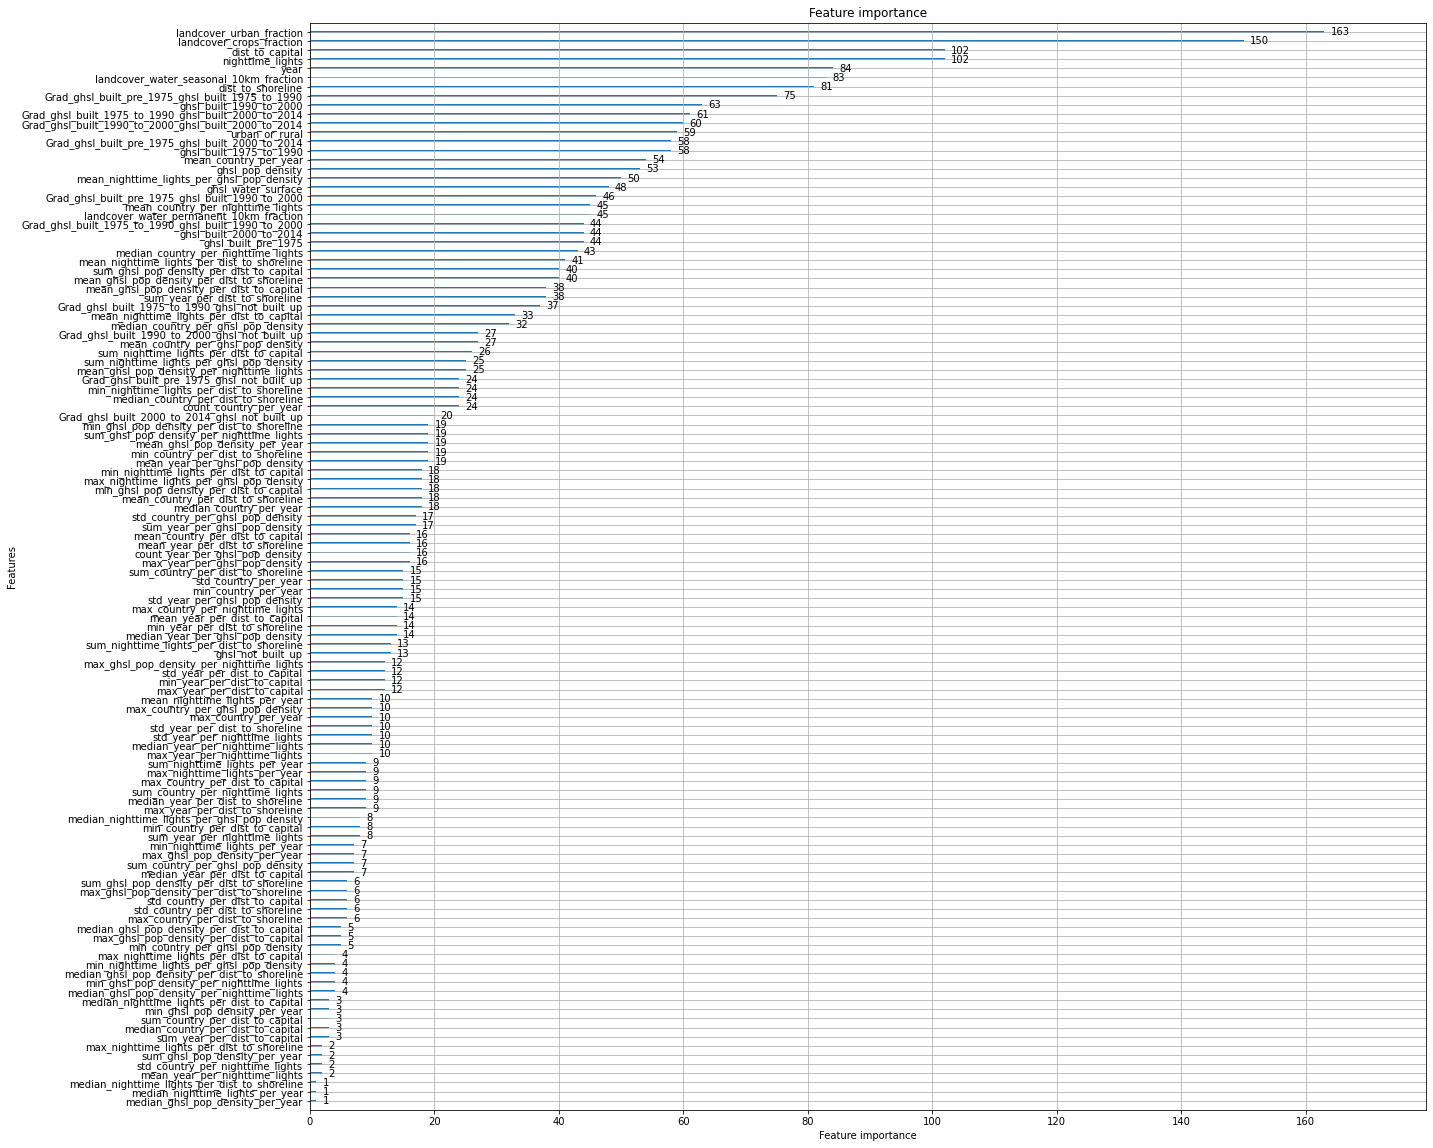

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
lgb.plot_importance(model)

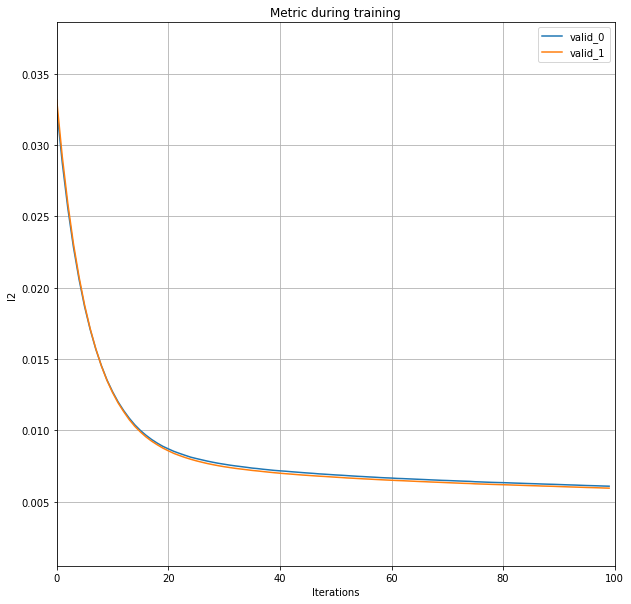

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
lgb.plot_metric(model)

In [ ]:
test.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


In [ ]:
testPro = DataPreprocess(test)

In [ ]:
test = testPro.makeNewFeatures(ColA, ColB, operation= ['mean', 'max', 'count', 'median', 'min', 'std', 'sum'])

In [ ]:
#test = testPro.makeNewFeatures_2(ColC, operation = ['first', 'max', 'min', 'average'])

In [ ]:
test = testPro.makeNewFeatures_Diff(ColD)

In [ ]:
sample_sub.head()

,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


In [ ]:
Submission = test['ID']

In [ ]:
test.drop(['ID', 'country'], inplace = True, axis = 1)   
#EncoDic['country'].classes_

In [ ]:
for k in EncoDic.keys():
    test[k] = EncoDic.get(k).transform(test[k])

In [ ]:
#test['Cluster'] = KM_cluster.predict(test)

In [ ]:
test['Target'] = model.predict(test)

In [ ]:
Submission = pd.concat([Submission, test['Target']], axis = 1)

In [ ]:
Submission.head()

,ID,Target
0,ID_AAcismbB,0.112456
1,ID_AAeBMsji,0.271471
2,ID_AAjFMjzy,0.632719
3,ID_AAmMOEEC,0.380301
4,ID_ABguzDxp,0.219085


In [ ]:
Submission.to_csv('Submission.csv', index = False)